<a href="https://colab.research.google.com/github/vidyacheekuri/LogiCast-M5-Forecasting/blob/main/1_Data_EDA_and_Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_dir = '/content/drive/MyDrive/M5Forecasting/'

# zip files to extract
zip_files = ['sales_train_validation.csv.zip', 'sell_prices.csv.zip']

for file in zip_files:
    with zipfile.ZipFile(zip_dir + file, 'r') as zip_ref:
        zip_ref.extractall(zip_dir)

print("Unzipped all files.")

Unzipped all files.


In [3]:
import pandas as pd

base_path = '/content/drive/MyDrive/M5Forecasting/'

# Load datasets
sales = pd.read_csv(base_path + 'sales_train_validation.csv')
calendar = pd.read_csv(base_path + 'calendar.csv')
prices = pd.read_csv(base_path + 'sell_prices.csv')

# Quick checks
print("Shapes:")
print("Sales:", sales.shape)
print("Calendar:", calendar.shape)
print("Prices:", prices.shape)

Shapes:
Sales: (30490, 1919)
Calendar: (1969, 14)
Prices: (6841121, 4)


In [ ]:
# Display first 5 rows of sales data
print("sales_train_validation.csv")
display(sales.head())

# Display first 5 rows of calendar data
print("\ncalendar.csv")
display(calendar.head())

# Display first 5 rows of sell prices data
print("\nsell_prices.csv")
display(prices.head())

sales_train_validation.csv


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4



calendar.csv


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1



sell_prices.csv


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


**Exploratory Data Analysis (EDA)**

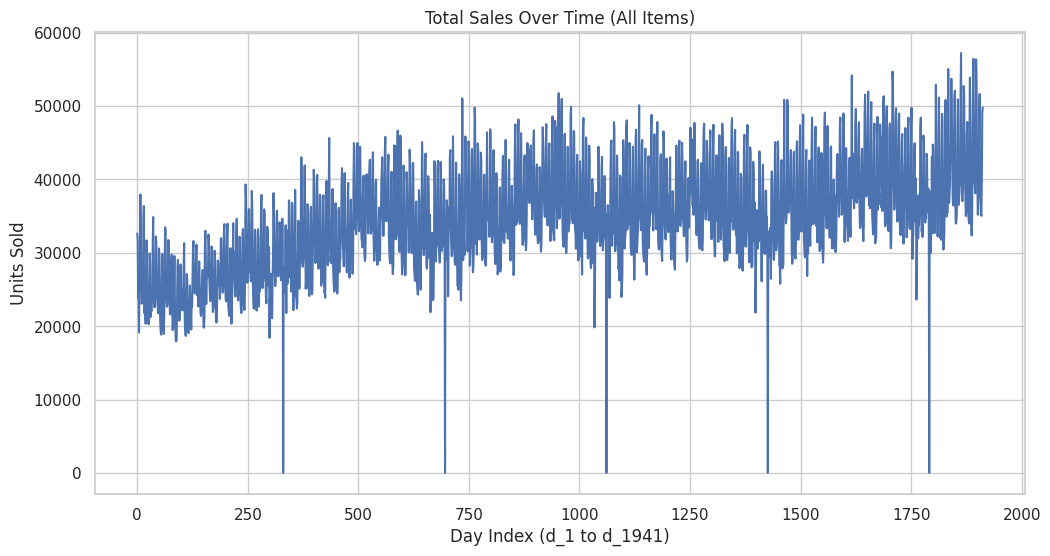

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Total daily sales across all items
sales_numeric = sales.iloc[:, 6:]  # day-wise sales columns
daily_totals = sales_numeric.sum(axis=0)

# Plot total sales over time
plt.plot(range(len(daily_totals)), daily_totals)
plt.title("Total Sales Over Time (All Items)")
plt.xlabel("Day Index (d_1 to d_1941)")
plt.ylabel("Units Sold")
plt.show()

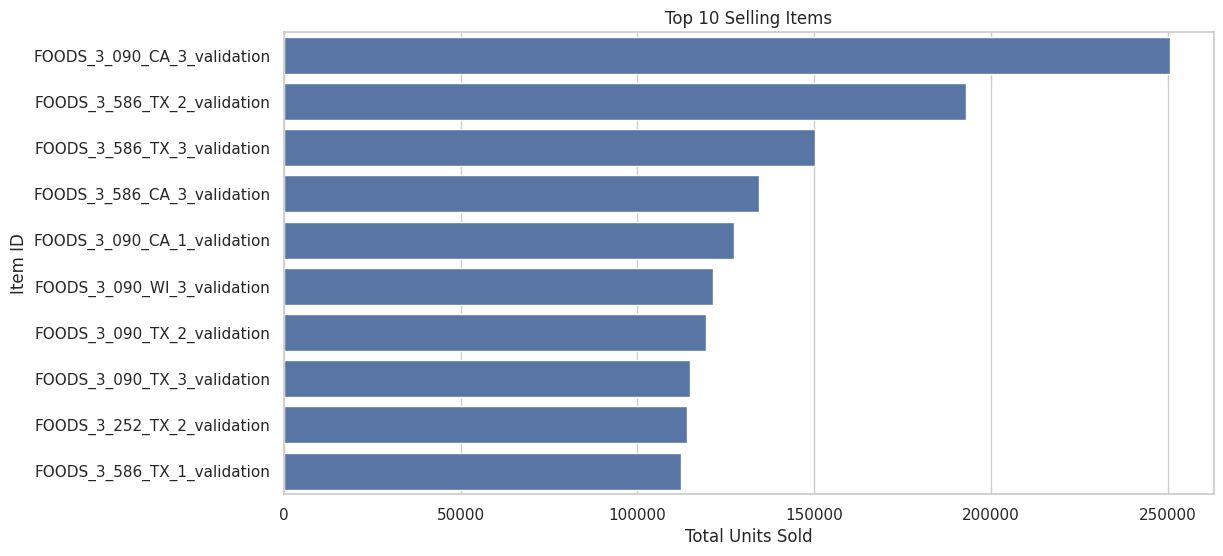

In [ ]:
#Top-Selling Items
item_sales_totals = sales_numeric.sum(axis=1)
sales['total_sales'] = item_sales_totals
top_items = sales.sort_values(by='total_sales', ascending=False).head(10)

# Barplot
sns.barplot(x='total_sales', y='id', data=top_items)
plt.title("Top 10 Selling Items")
plt.xlabel("Total Units Sold")
plt.ylabel("Item ID")
plt.show()

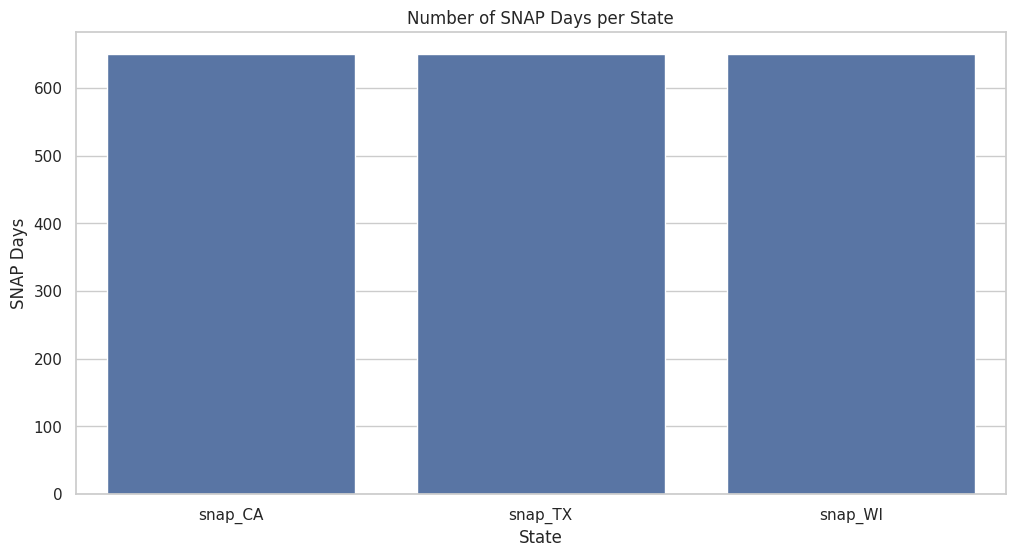

In [ ]:
# Plot number of SNAP days by state
snap_by_state = calendar[['date', 'snap_CA', 'snap_TX', 'snap_WI']].melt(id_vars='date', var_name='state', value_name='snap')
snap_by_state['date'] = pd.to_datetime(snap_by_state['date'])

snap_counts = snap_by_state.groupby('state')['snap'].sum().reset_index()

sns.barplot(x='state', y='snap', data=snap_counts)
plt.title("Number of SNAP Days per State")
plt.xlabel("State")
plt.ylabel("SNAP Days")
plt.show()

In [4]:
# Sample 5000 rows from full sales data
sales_sample = sales.sample(n=5000, random_state=42)

# Melt sampled sales data
sales_long = pd.melt(
    sales_sample,
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='sales'
)

# Merge with calendar
merged = sales_long.merge(calendar, how='left', on='d')

# Merge with prices
merged = merged.merge(
    prices,
    how='left',
    on=['store_id', 'item_id', 'wm_yr_wk']
)

print("Merged Data Shape:", merged.shape)
display(merged.head())

Merged Data Shape: (9565000, 22)


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,FOODS_3_180_CA_1_validation,FOODS_3_180,FOODS_3,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOUSEHOLD_2_383_CA_3_validation,HOUSEHOLD_2_383,HOUSEHOLD_2,HOUSEHOLD,CA_3,CA,d_1,2,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,3.97
2,FOODS_3_409_CA_3_validation,FOODS_3_409,FOODS_3,FOODS,CA_3,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,FOODS_1_097_CA_2_validation,FOODS_1_097,FOODS_1,FOODS,CA_2,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_272_TX_2_validation,HOBBIES_1_272,HOBBIES_1,HOBBIES,TX_2,TX,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


In [5]:
# Save merged 5K sample to CSV
merged.to_csv('/content/drive/MyDrive/M5Forecasting/merged_5k_sample.csv', index=False)